In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import pickle

In [2]:
books = pd.read_csv("BooksDataSet.csv")

In [3]:
books.head(7)

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...
5,5,19401625,Thendara House,Fantasy,The novel concerns the dwelling of the Darkov...
6,6,6563632,The Thief,Fantasy,"Gen is released from prison by the magus, the..."


In [4]:
books = books[["book_id", "book_name", "genre", "summary"]]

In [5]:
books.tail()

,book_id,book_name,genre,summary
2995,10372180,White Death,Thriller,"A Novel from the NUMA files, A Kurt Austin Ad..."
2996,14504372,Venus with Pistol,Thriller,Gilbert Kemp is dealer specializing in antiqu...
2997,3617412,Blackwater,Thriller,"""How do you know when you're in too deep? Dav..."
2998,11320975,The Rainbow and the Rose,Thriller,The story concerns the life of Johnnie Pascoe...
2999,17227674,Chiefs,Thriller,The First Chief: Will Henry Lee: The novel op...


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8484\555790564.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = books['genre'],palette='plasma')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

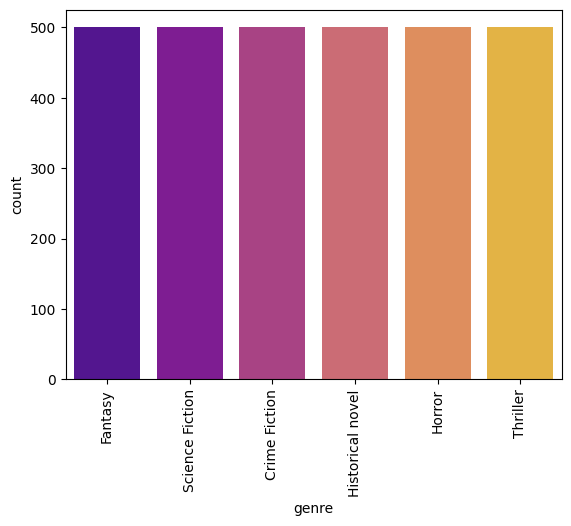

In [7]:
sns.countplot(x = books['genre'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [8]:
books["summary"].loc[2]

' Cugel is easily persuaded by the merchant Fianosther to attempt the burglary of the manse of Iucounu the Laughing Magician. Trapped and caught, he agrees that in exchange for his freedom he will undertake the recovery of a small hemisphere of violet glass, an Eye of the Overworld, to match one already in the wizard\'s possession. A small sentient alien entity of barbs and hooks, named Firx, is attached to his liver to encourage his "unremitting loyalty, zeal and singleness of purpose," and Iucounu uses a spell to transport Cugel via flying demon to the remote Land of Cutz. There, Cugel finds two villages, one occupied by wearers of the violet lenses, the other by peasants who work on behalf of the lens-wearers, in hopes of being promoted to their ranks. The lenses cause their wearers to see, not their squalid surroundings, but the Overworld, a vastly superior version of reality where a hut is a palace, gruel is a magnificent feast, etc. — "seeing the world through rose-colored glasse

In [9]:
## cleaning the text

def cleantext(text):
    
    # removing the "\"
    
    text = re.sub("'\''","",text)
    
    # removing special symbols
    
    text = re.sub("[^a-zA-Z]"," ",text)
    
    # removing the whitespaces
    
    text = ' '.join(text.split())
    
    # convert text to lowercase
    
    text = text.lower()
    
    return text

In [10]:
books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[2]

'cugel is easily persuaded by the merchant fianosther to attempt the burglary of the manse of iucounu the laughing magician trapped and caught he agrees that in exchange for his freedom he will undertake the recovery of a small hemisphere of violet glass an eye of the overworld to match one already in the wizard s possession a small sentient alien entity of barbs and hooks named firx is attached to his liver to encourage his unremitting loyalty zeal and singleness of purpose and iucounu uses a spell to transport cugel via flying demon to the remote land of cutz there cugel finds two villages one occupied by wearers of the violet lenses the other by peasants who work on behalf of the lens wearers in hopes of being promoted to their ranks the lenses cause their wearers to see not their squalid surroundings but the overworld a vastly superior version of reality where a hut is a palace gruel is a magnificent feast etc seeing the world through rose colored glasses on a grand scale cugel gai

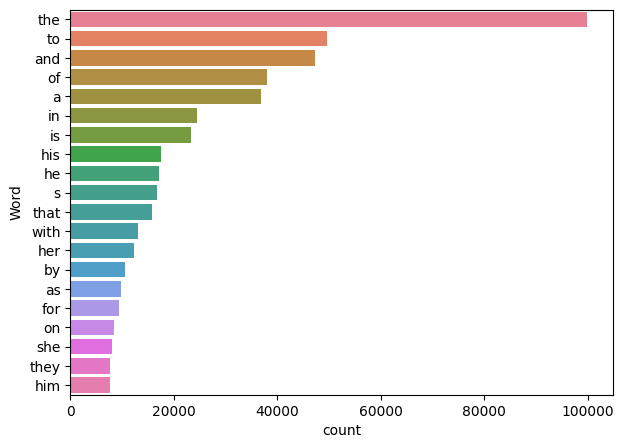

In [11]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sns.barplot(data=df,x = 'count',y = 'word', hue='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
    
# 20 most frequent words

wordsdf = showmostfrequentwords(books['summary'],20)

In [12]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# removing the stopwords

def removestopwords(text):
    
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

books['summary'] = books['summary'].apply(lambda x:removestopwords(x))
books['summary'].iloc[2]

'cugel easily persuaded merchant fianosther attempt burglary manse iucounu laughing magician trapped caught agrees exchange freedom undertake recovery small hemisphere violet glass eye overworld match one already wizard possession small sentient alien entity barbs hooks named firx attached liver encourage unremitting loyalty zeal singleness purpose iucounu uses spell transport cugel via flying demon remote land cutz cugel finds two villages one occupied wearers violet lenses peasants work behalf lens wearers hopes promoted ranks lenses cause wearers see squalid surroundings overworld vastly superior version reality hut palace gruel magnificent feast etc seeing world rose colored glasses grand scale cugel gains eye trickery escapes cutz undertakes arduous trek back iucounu cursing magician entire way forms principal part book many pitfalls setbacks harrowing escapes including eviction firx system cugel returns iucounu manse finds wizard volition captured twin firx cugel manages extirpat

In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    lemSentence = ""
    for word in sentence.split():
        lem = lemma.lemmatize(word)
        lemSentence += lem
        lemSentence += " "
    lemSentence = lemSentence.strip()
    return lemSentence


books['summary'] = books['summary'].apply(lambda x: lematizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
        
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

books['summary'] = books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[2]

'cugel easili persuad merchant fianosth attempt burglari mans iucounu laugh magician trap caught agre exchang freedom undertak recoveri small hemispher violet glass eye overworld match one alreadi wizard possess small sentient alien entiti barb hook name firx attach liver encourag unremit loyalti zeal singl purpos iucounu us spell transport cugel via fli demon remot land cutz cugel find two villag one occupi wearer violet len peasant work behalf len wearer hope promot rank len caus wearer see squalid surround overworld vastli superior version realiti hut palac gruel magnific feast etc see world rose color glass grand scale cugel gain eye trickeri escap cutz undertak arduou trek back iucounu curs magician entir way form princip part book mani pitfal setback harrow escap includ evict firx system cugel return iucounu mans find wizard volit captur twin firx cugel manag extirp alien subdu magician enjoy easi life mans tri banish iucounu fianosth come pilfer cugel spell magician use cugel to

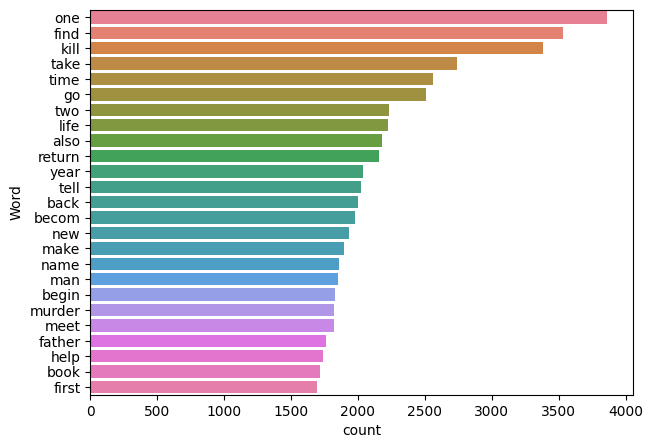

In [17]:
freq_df = showmostfrequentwords(books['summary'],25)

In [18]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap = 'plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


In [19]:
# Encoding 
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [20]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [21]:
# count vectorizer

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

<3000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 245387 stored elements in Compressed Sparse Row format>

In [22]:
y_count_vec = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,y_count_vec,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((2400, 1000), (600, 1000))

In [23]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, svccpred))

0.575


In [24]:
# Multinomial Naive Bayes Classifier
mb = MultinomialNB()
mb.fit(X_train, y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test, mbpred))

0.64


In [25]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test, rf_pred))

0.5983333333333334


In [26]:
# Multilayer Perceptron
snet = MLPClassifier()
snet.fit(X_train, y_train)
snet_pred = snet.predict(X_test)
print(metrics.accuracy_score(y_test, snet_pred))

0.6233333333333333


In [27]:
#Labeling each 'genre' with an unique number 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

X_train,X_test,y_train,y_test = train_test_split(books['summary']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((2400,), (600,))

In [28]:
#Performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [29]:
# Support Vector Classifier
svc = SVC()
svc.fit(xtrain_tfidf,y_train)
svccpred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,svccpred))

0.775


In [30]:
# Multinomial Naive Bayes
mb = MultinomialNB()
mb.fit(xtrain_tfidf,y_train)
mbpred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))

0.78


In [34]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(xtrain_tfidf, y_train)
rf_pred = rf.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, rf_pred))

0.61


In [35]:
# Multilayer Perceptron
snet = MLPClassifier()
snet.fit(xtrain_tfidf, y_train)
snet_pred = snet.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, snet_pred))

0.7733333333333333


In [36]:
def test(text,model):
    
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted



ans = books['summary'].apply(lambda text:test(text,snet))
ans

0       [0]
1       [5]
2       [0]
3       [0]
4       [0]
       ... 
2995    [0]
2996    [5]
2997    [5]
2998    [5]
2999    [5]
Name: summary, Length: 3000, dtype: object

In [37]:
predicted_genres = []
for i in range(len(ans)):
    
    index_val = ans[i][0]
    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])

In [41]:
predicted_genres

['Fantasy',
 'Thriller',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Historical novel',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Science Fiction',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy',
 'Fantasy'

In [39]:
# mapping the training genre as well

newmap = dict([(value,key) for key,value in mapper.items()])
newmap

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [42]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted_genre'] = np.array(predicted_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted_genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,Fantasy,Thriller
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [43]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books

,book_name,summary,Actual Genre,Predicted_genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Thriller
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,book open herald mage vanyel return countri va...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Fantasy
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know deep davey alway live shadow older brothe...,Thriller,Thriller
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Thriller


In [44]:
dict(Counter(books['Actual Genre'].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [45]:
dict(Counter(books['Predicted_genre'].values))

{'Fantasy': 498,
 'Thriller': 495,
 'Historical novel': 519,
 'Science Fiction': 494,
 'Horror': 492,
 'Crime Fiction': 502}

In [49]:
with open('bookgenre_net.pkl', 'wb') as file:
    pickle.dump(snet, file)

In [ ]:
with open('.pkl', 'wb') as file:
    pickle.dump(snet, file)